In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from time import sleep
import re
import time
import numpy as np
import json
import math
import sys
from datetime import datetime, timedelta
import csv
import pandas as pd
import urllib.parse



# Data Scraping

## Obtaining symbols for all companies to make a list of website links 

In [2]:
screener = pd.read_csv("nasdaq_screener.csv")


websites=[]
base_url = r'https://www.nasdaq.com/market-activity/stocks/'
symbols = screener['Symbol'].tolist()
newsym=[]
for i in symbols:
    encoded_symbol = urllib.parse.quote(str(i), safe='')
    link = base_url + encoded_symbol + '/financials'
    if '%' not in link:
        websites.append(link)
        newsym.append(i)




In [3]:
for i in websites:
    print(f"websites:{i}")


websites:https://www.nasdaq.com/market-activity/stocks/A/financials
websites:https://www.nasdaq.com/market-activity/stocks/AA/financials
websites:https://www.nasdaq.com/market-activity/stocks/AAC/financials
websites:https://www.nasdaq.com/market-activity/stocks/AACG/financials
websites:https://www.nasdaq.com/market-activity/stocks/AACI/financials
websites:https://www.nasdaq.com/market-activity/stocks/AACIU/financials
websites:https://www.nasdaq.com/market-activity/stocks/AACIW/financials
websites:https://www.nasdaq.com/market-activity/stocks/AACT/financials
websites:https://www.nasdaq.com/market-activity/stocks/AADI/financials
websites:https://www.nasdaq.com/market-activity/stocks/AAIC/financials
websites:https://www.nasdaq.com/market-activity/stocks/AAIN/financials
websites:https://www.nasdaq.com/market-activity/stocks/AAL/financials
websites:https://www.nasdaq.com/market-activity/stocks/AAMC/financials
websites:https://www.nasdaq.com/market-activity/stocks/AAME/financials
websites:ht

In [4]:
for i in newsym:
    print(i)

A
AA
AAC
AACG
AACI
AACIU
AACIW
AACT
AADI
AAIC
AAIN
AAL
AAMC
AAME
AAN
AAOI
AAON
AAP
AAPL
AAT
AAU
AB
ABBV
ABCB
ABCL
ABCM
ABEO
ABEV
ABG
ABIO
ABL
ABLLW
ABLV
ABLVW
ABM
ABNB
ABOS
ABR
ABSI
ABT
ABUS
ABVC
AC
ACA
ACAB
ACABW
ACAC
ACACU
ACACW
ACAD
ACAQ
ACAX
ACAXR
ACAXU
ACAXW
ACB
ACBA
ACBAW
ACCD
ACCO
ACDC
ACDCW
ACEL
ACER
ACET
ACGL
ACGLN
ACGLO
ACHC
ACHL
ACHR
ACHV
ACI
ACIC
ACIU
ACIW
ACLS
ACLX
ACM
ACMR
ACN
ACNB
ACNT
ACON
ACONW
ACOR
ACP
ACR
ACRE
ACRO
ACRS
ACRV
ACRX
ACST
ACT
ACTG
ACU
ACV
ACVA
ACXP
ADAG
ADAP
ADBE
ADC
ADCT
ADD
ADEA
ADER
ADERW
ADES
ADEX
ADI
ADIL
ADM
ADMA
ADMP
ADN
ADNT
ADNWW
ADOC
ADOCR
ADOCW
ADP
ADPT
ADRT
ADSE
ADSEW
ADSK
ADT
ADTH
ADTHW
ADTN
ADTX
ADUS
ADV
ADVM
ADX
ADXN
AE
AEAE
AEAEW
AEE
AEF
AEFC
AEG
AEHL
AEHR
AEI
AEIS
AEL
AEM
AEMD
AENT
AENZ
AEO
AEON
AEP
AER
AES
AESC
AESI
AEVA
AEY
AEYE
AEZS
AFAR
AFB
AFBI
AFCG
AFG
AFGB
AFGC
AFGD
AFGE
AFIB
AFL
AFMD
AFRI
AFRIW
AFRM
AFT
AFYA
AG
AGAE
AGBA
AGBAW
AGCO
AGD
AGE
AGEN
AGFY
AGI
AGIL
AGILW
AGIO
AGL
AGLE
AGM
AGMH
AGNC
AGNCL
AGNCM
AGNCN
AGNCO
AGNCP
AGO
AGR


In [7]:
broken=[]
nr=[]

## Scraping data from the first website

In [23]:
path=r"C:\Users\dell\Desktop\chromedriver-win64\chromedriver-win64\chromedriver.exe"

browser = webdriver.Chrome(path)

try:
    browser.get('https://www.nasdaq.com/market-activity/stocks/a/financials')
    table = browser.find_element(By.XPATH,"//table[@class='financials__table']")
    income_statement = {}
    headings_tr = table.find_element(By.XPATH,".//tr[@class='financials__row financials__row--headings']")
    headings_html = headings_tr.find_elements(By.XPATH,".//th")
    headings = []
    for heading in headings_html:
        headings.append(heading.get_attribute('textContent'))
     
    rows = table.find_elements(By.XPATH,".//tr[@class='financials__row']")
    rows[0].find_element(By.XPATH,".//th").get_attribute('textContent')
    #income_statement["headings"] = headings
    for row in rows:
        key = row.find_element(By.XPATH,".//th").get_attribute('textContent')
        values_td = row.find_elements(By.XPATH,".//td")
        values = []
        for value in values_td:
            values.append(value.get_attribute('textContent'))
        income_statement[key] = values
    csv_file_path = 'financial_data.csv'
    
    with open(csv_file_path, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
    
        csv_writer.writerow(headings)
    
        for category, values in income_statement.items():
            csv_writer.writerow([category] + values)
    
    print(f'Data has been written to {csv_file_path}')
    
    
except Exception as e:
    print(f"Error while processing 'https://www.nasdaq.com/market-activity/stocks/aa/financials': {e}")
        

C:\Users\dell\AppData\Local\Temp\ipykernel_15724\3031470829.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(path)


Data has been written to financial_data.csv


In [25]:
data = pd.read_csv("financial_data.csv")
data

,Period Ending:,10/31/2022,10/31/2021,10/31/2020,10/31/2019
0,Total Revenue,"$6,848,000","$6,319,000","$5,339,000","$5,163,000"
1,Cost of Revenue,"$3,126,000","$2,912,000","$2,502,000","$2,358,000"
2,Gross Profit,"$3,722,000","$3,407,000","$2,837,000","$2,805,000"
3,Operating Expenses,NaN,NaN,NaN,NaN
4,Research and Development,"$467,000","$441,000","$495,000","$404,000"
5,"Sales, General and Admin.","$1,637,000","$1,619,000","$1,496,000","$1,460,000"
6,Non-Recurring Items,--,--,--,--
7,Other Operating Items,--,--,--,--
8,Operating Income,"$1,618,000","$1,347,000","$846,000","$941,000"
9,Add'l income/expense items,"-$30,000","$94,000","$74,000","$52,000"


## The tranformation of this CSV file to the desired format is done in the CSV cleaning.ipynb

## Scraping all the websites and appending it to the desired format of csv.

In [16]:
path=r"C:\Users\dell\Desktop\chromedriver-win64\chromedriver-win64\chromedriver.exe"

browser = webdriver.Chrome(path)
counter=0

for web in websites:
    if counter<2:
        counter=counter+1
        print("Already updated!\n\n")
        continue
    else:
        try:
            browser.get(web)
            table = browser.find_element(By.XPATH,"//table[@class='financials__table']")
            income_statement = {}
            headings_tr = table.find_element(By.XPATH,".//tr[@class='financials__row financials__row--headings']")
            headings_html = headings_tr.find_elements(By.XPATH,".//th")
            headings = []
            for heading in headings_html:
                headings.append(heading.get_attribute('textContent'))
             
            rows = table.find_elements(By.XPATH,".//tr[@class='financials__row']")
            rows[0].find_element(By.XPATH,".//th").get_attribute('textContent')
            #income_statement["headings"] = headings
            for row in rows:
                key = row.find_element(By.XPATH,".//th").get_attribute('textContent')
                values_td = row.find_elements(By.XPATH,".//td")
                values = []
                for value in values_td:
                    values.append(value.get_attribute('textContent'))
                income_statement[key] = values
            csv_file_path = 'financial_data.csv'
        
            with open(csv_file_path, 'w', newline='') as csvfile:
                csv_writer = csv.writer(csvfile)
            
                csv_writer.writerow(headings)
            
                for category, values in income_statement.items():
                    csv_writer.writerow([category] + values)
            
            print(f'Data has been written to {csv_file_path}')
            
            
            df = pd.read_csv("updated_data.csv")
            data = pd.read_csv("financial_data.csv")
            num_columns = data.shape[1]
            data_col=df.shape[1]
            for i in range(1,num_columns):
                c1= data.iloc[:, i]   
                c1=c1.tolist()
                h1 = data.columns[i]
                nr=[newsym[counter]]
                nr.append(h1)
                nr.extend(c1)
                if(len(nr) != data_col):
                    nr += ['--'] * (data_col - len(nr))
                df.loc[len(df)] = nr
                nr.clear()
            print("\nCSV updated successfully!\n")
            df.to_csv('updated_data.csv', index=False)
            counter=counter+1
        except Exception as e:
            print(f"Error while processing {web}: {e}")
            broken.append(web)
            counter=counter+1
            

C:\Users\dell\AppData\Local\Temp\ipykernel_15724\3318658414.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(path)


Already updated!


Already updated!


Data has been written to financial_data.csv

CSV updated successfully!

Data has been written to financial_data.csv

CSV updated successfully!

Data has been written to financial_data.csv

CSV updated successfully!

Data has been written to financial_data.csv

CSV updated successfully!

Data has been written to financial_data.csv

CSV updated successfully!

Error while processing https://www.nasdaq.com/market-activity/stocks/AACT/financials: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//table[@class='financials__table']"}
  (Session info: chrome=119.0.6045.106)
Stacktrace:
	GetHandleVerifier [0x00007FF636B282B2+55298]
	(No symbol) [0x00007FF636A95E02]
	(No symbol) [0x00007FF6369505AB]
	(No symbol) [0x00007FF63699175C]
	(No symbol) [0x00007FF6369918DC]
	(No symbol) [0x00007FF6369CCBC7]
	(No symbol) [0x00007FF6369B20EF]
	(No symbol) [0x00007FF6369CAAA4]
	(No symbol) [0x00007FF6369B1E83]
	(No symbol) [0x00007FF636

## The final formatted CSV with all the webites appended looks something like this

In [18]:
df

,Symbol,Period Ending,Total Revenue,Cost of Revenue,Gross Profit,Operating Expenses,Research and Development,"Sales, General and Admin.",Non-Recurring Items,Other Operating Items,...,Add'l income/expense items,Earnings Before Interest and Tax,Interest Expense,Earnings Before Tax,Income Tax,Minority Interest,Equity Earnings/Loss Unconsolidated Subsidiary,Net Income-Cont. Operations,Net Income,Net Income Applicable to Common Shareholders
0,a,10/31/2022,"$6,848,000","$3,126,000","$3,722,000",NaN,"$467,000","$1,637,000",--,--,...,"-$30,000","$1,588,000","$84,000","$1,504,000","$250,000",--,--,"$1,254,000","$1,254,000","$1,254,000"
1,a,10/31/2021,"$6,319,000","$2,912,000","$3,407,000",NaN,"$441,000","$1,619,000",--,--,...,"$94,000","$1,441,000","$81,000","$1,360,000","$150,000",--,--,"$1,210,000","$1,210,000","$1,210,000"
2,a,10/31/2020,"$5,339,000","$2,502,000","$2,837,000",NaN,"$495,000","$1,496,000",--,--,...,"$74,000","$920,000","$78,000","$842,000","$123,000",--,--,"$719,000","$719,000","$719,000"
3,a,10/31/2019,"$5,163,000","$2,358,000","$2,805,000",NaN,"$404,000","$1,460,000",--,--,...,"$52,000","$993,000","$74,000","$919,000","-$152,000",--,--,"$1,071,000","$1,071,000","$1,071,000"
4,aa,12/31/2022,"$12,451,000","$10,212,000","$2,239,000",NaN,"$32,000","$204,000","$696,000","$617,000",...,"$118,000","$808,000","$106,000","$702,000","$664,000",--,"-$161,000","-$123,000","-$123,000","-$123,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,ZYME,Unnamed: 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25708,ZYXI,12/31/2022,"$158,167","$32,005","$126,162",NaN,--,"$103,224",--,--,...,-$300,"$22,638",$440,"$22,198","$5,150",--,--,"$17,048","$17,048","$17,048"
25709,ZYXI,12/31/2021,"$130,301","$27,321","$102,980",NaN,--,"$80,614",--,--,...,--,"$22,366",$95,"$22,271","$5,168",--,--,"$17,103","$17,103","$17,103"
25710,ZYXI,12/31/2020,"$80,122","$17,417","$62,705",NaN,--,"$52,456",--,--,...,--,"$10,172",$19,"$10,153","$1,079",--,--,"$8,997","$9,074","$9,074"


### The number of websites not included in the final version of CSV. This is due to broken links or the company stopped trading.
### Some links had error displaying the tables as well.

In [27]:
len(broken)

531

# Data Cleaning

In [28]:
df = pd.read_csv("updated_data.csv")

In [29]:
# Removing the Operation Expenses coloumn as it's NULL for all websites.
columns_to_drop = ['Operating Expenses']
df.drop(columns=columns_to_drop, inplace=True)
df.head()


,Symbol,Period Ending,Total Revenue,Cost of Revenue,Gross Profit,Research and Development,"Sales, General and Admin.",Non-Recurring Items,Other Operating Items,Operating Income,Add'l income/expense items,Earnings Before Interest and Tax,Interest Expense,Earnings Before Tax,Income Tax,Minority Interest,Equity Earnings/Loss Unconsolidated Subsidiary,Net Income-Cont. Operations,Net Income,Net Income Applicable to Common Shareholders
0,a,10/31/2022,"$6,848,000","$3,126,000","$3,722,000","$467,000","$1,637,000",--,--,"$1,618,000","-$30,000","$1,588,000","$84,000","$1,504,000","$250,000",--,--,"$1,254,000","$1,254,000","$1,254,000"
1,a,10/31/2021,"$6,319,000","$2,912,000","$3,407,000","$441,000","$1,619,000",--,--,"$1,347,000","$94,000","$1,441,000","$81,000","$1,360,000","$150,000",--,--,"$1,210,000","$1,210,000","$1,210,000"
2,a,10/31/2020,"$5,339,000","$2,502,000","$2,837,000","$495,000","$1,496,000",--,--,"$846,000","$74,000","$920,000","$78,000","$842,000","$123,000",--,--,"$719,000","$719,000","$719,000"
3,a,10/31/2019,"$5,163,000","$2,358,000","$2,805,000","$404,000","$1,460,000",--,--,"$941,000","$52,000","$993,000","$74,000","$919,000","-$152,000",--,--,"$1,071,000","$1,071,000","$1,071,000"
4,aa,12/31/2022,"$12,451,000","$10,212,000","$2,239,000","$32,000","$204,000","$696,000","$617,000","$690,000","$118,000","$808,000","$106,000","$702,000","$664,000",--,"-$161,000","-$123,000","-$123,000","-$123,000"


In [43]:
df.replace("--", "0", inplace=True)   #replacing -- with 0
df.fillna(0, inplace=True)     #replacing Nan with 0

df


,Symbol,Period Ending,Total Revenue,Cost of Revenue,Gross Profit,Research and Development,"Sales, General and Admin.",Non-Recurring Items,Other Operating Items,Operating Income,Add'l income/expense items,Earnings Before Interest and Tax,Interest Expense,Earnings Before Tax,Income Tax,Minority Interest,Equity Earnings/Loss Unconsolidated Subsidiary,Net Income-Cont. Operations,Net Income,Net Income Applicable to Common Shareholders
0,a,10/31/2022,"$6,848,000","$3,126,000","$3,722,000","$467,000","$1,637,000",0,0,"$1,618,000","-$30,000","$1,588,000","$84,000","$1,504,000","$250,000",0,0,"$1,254,000","$1,254,000","$1,254,000"
1,a,10/31/2021,"$6,319,000","$2,912,000","$3,407,000","$441,000","$1,619,000",0,0,"$1,347,000","$94,000","$1,441,000","$81,000","$1,360,000","$150,000",0,0,"$1,210,000","$1,210,000","$1,210,000"
2,a,10/31/2020,"$5,339,000","$2,502,000","$2,837,000","$495,000","$1,496,000",0,0,"$846,000","$74,000","$920,000","$78,000","$842,000","$123,000",0,0,"$719,000","$719,000","$719,000"
3,a,10/31/2019,"$5,163,000","$2,358,000","$2,805,000","$404,000","$1,460,000",0,0,"$941,000","$52,000","$993,000","$74,000","$919,000","-$152,000",0,0,"$1,071,000","$1,071,000","$1,071,000"
4,aa,12/31/2022,"$12,451,000","$10,212,000","$2,239,000","$32,000","$204,000","$696,000","$617,000","$690,000","$118,000","$808,000","$106,000","$702,000","$664,000",0,"-$161,000","-$123,000","-$123,000","-$123,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,ZYME,Unnamed: 4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25708,ZYXI,12/31/2022,"$158,167","$32,005","$126,162",0,"$103,224",0,0,"$22,938",-$300,"$22,638",$440,"$22,198","$5,150",0,0,"$17,048","$17,048","$17,048"
25709,ZYXI,12/31/2021,"$130,301","$27,321","$102,980",0,"$80,614",0,0,"$22,366",0,"$22,366",$95,"$22,271","$5,168",0,0,"$17,103","$17,103","$17,103"
25710,ZYXI,12/31/2020,"$80,122","$17,417","$62,705",0,"$52,456",0,0,"$10,249",0,"$10,172",$19,"$10,153","$1,079",0,0,"$8,997","$9,074","$9,074"


In [32]:
columns = df.columns.tolist()
columns=columns[2:]
columns

['Total Revenue',
 'Cost of Revenue',
 'Gross Profit',
 'Research and Development',
 'Sales, General and Admin.',
 'Non-Recurring Items',
 'Other Operating Items',
 'Operating Income',
 "Add'l income/expense items",
 'Earnings Before Interest and Tax',
 'Interest Expense',
 'Earnings Before Tax',
 'Income Tax',
 'Minority Interest',
 'Equity Earnings/Loss Unconsolidated Subsidiary',
 'Net Income-Cont. Operations',
 'Net Income',
 'Net Income Applicable to Common Shareholders']

In [44]:
# Removing the $ sign and , and converting the values into integers

for column in columns:
    df[column] = df[column].replace('[\$,]', '', regex=True).astype(int)

df.head()


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\dell\AppData\Local\Temp\ipykernel_15724\1520706283.py:4: SyntaxWarning: invalid escape sequence '\$'
  df[column] = df[column].replace('[\$,]', '', regex=True).astype(int)


,Symbol,Period Ending,Total Revenue,Cost of Revenue,Gross Profit,Research and Development,"Sales, General and Admin.",Non-Recurring Items,Other Operating Items,Operating Income,Add'l income/expense items,Earnings Before Interest and Tax,Interest Expense,Earnings Before Tax,Income Tax,Minority Interest,Equity Earnings/Loss Unconsolidated Subsidiary,Net Income-Cont. Operations,Net Income,Net Income Applicable to Common Shareholders
0,a,10/31/2022,6848000,3126000,3722000,467000,1637000,0,0,1618000,-30000,1588000,84000,1504000,250000,0,0,1254000,1254000,1254000
1,a,10/31/2021,6319000,2912000,3407000,441000,1619000,0,0,1347000,94000,1441000,81000,1360000,150000,0,0,1210000,1210000,1210000
2,a,10/31/2020,5339000,2502000,2837000,495000,1496000,0,0,846000,74000,920000,78000,842000,123000,0,0,719000,719000,719000
3,a,10/31/2019,5163000,2358000,2805000,404000,1460000,0,0,941000,52000,993000,74000,919000,-152000,0,0,1071000,1071000,1071000
4,aa,12/31/2022,12451000,10212000,2239000,32000,204000,696000,617000,690000,118000,808000,106000,702000,664000,0,-161000,-123000,-123000,-123000


In [64]:
#Normalizing Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df

,symbol,period_ending,total_revenue,cost_of_revenue,gross_profit,research_and_development,"sales,_general_and_admin.",non-recurring_items,other_operating_items,operating_income,add'l_income/expense_items,earnings_before_interest_and_tax,interest_expense,earnings_before_tax,income_tax,minority_interest,equity_earnings/loss_unconsolidated_subsidiary,net_income-cont._operations,net_income,net_income_applicable_to_common_shareholders
0,a,10/31/2022,6848000,3126000,3722000,467000,1637000,0,0,1618000,-30000,1588000,84000,1504000,250000,0,0,1254000,1254000,1254000
1,a,10/31/2021,6319000,2912000,3407000,441000,1619000,0,0,1347000,94000,1441000,81000,1360000,150000,0,0,1210000,1210000,1210000
2,a,10/31/2020,5339000,2502000,2837000,495000,1496000,0,0,846000,74000,920000,78000,842000,123000,0,0,719000,719000,719000
3,a,10/31/2019,5163000,2358000,2805000,404000,1460000,0,0,941000,52000,993000,74000,919000,-152000,0,0,1071000,1071000,1071000
4,aa,12/31/2022,12451000,10212000,2239000,32000,204000,696000,617000,690000,118000,808000,106000,702000,664000,0,-161000,-123000,-123000,-123000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25707,ZYME,Unnamed: 4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25708,ZYXI,12/31/2022,158167,32005,126162,0,103224,0,0,22938,-300,22638,440,22198,5150,0,0,17048,17048,17048
25709,ZYXI,12/31/2021,130301,27321,102980,0,80614,0,0,22366,0,22366,95,22271,5168,0,0,17103,17103,17103
25710,ZYXI,12/31/2020,80122,17417,62705,0,52456,0,0,10249,0,10172,19,10153,1079,0,0,8997,9074,9074


In [67]:
garbage_values = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']   #removing the NULL rows

df = df[df.period_ending.isin(garbage_values) == False]
df

,symbol,period_ending,total_revenue,cost_of_revenue,gross_profit,research_and_development,"sales,_general_and_admin.",non-recurring_items,other_operating_items,operating_income,add'l_income/expense_items,earnings_before_interest_and_tax,interest_expense,earnings_before_tax,income_tax,minority_interest,equity_earnings/loss_unconsolidated_subsidiary,net_income-cont._operations,net_income,net_income_applicable_to_common_shareholders
0,a,10/31/2022,6848000,3126000,3722000,467000,1637000,0,0,1618000,-30000,1588000,84000,1504000,250000,0,0,1254000,1254000,1254000
1,a,10/31/2021,6319000,2912000,3407000,441000,1619000,0,0,1347000,94000,1441000,81000,1360000,150000,0,0,1210000,1210000,1210000
2,a,10/31/2020,5339000,2502000,2837000,495000,1496000,0,0,846000,74000,920000,78000,842000,123000,0,0,719000,719000,719000
3,a,10/31/2019,5163000,2358000,2805000,404000,1460000,0,0,941000,52000,993000,74000,919000,-152000,0,0,1071000,1071000,1071000
4,aa,12/31/2022,12451000,10212000,2239000,32000,204000,696000,617000,690000,118000,808000,106000,702000,664000,0,-161000,-123000,-123000,-123000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25705,ZYME,12/31/2021,26680,0,26680,199752,42561,0,0,-215633,3274,-212359,0,-212359,-516,0,0,-211843,-211843,-211843
25708,ZYXI,12/31/2022,158167,32005,126162,0,103224,0,0,22938,-300,22638,440,22198,5150,0,0,17048,17048,17048
25709,ZYXI,12/31/2021,130301,27321,102980,0,80614,0,0,22366,0,22366,95,22271,5168,0,0,17103,17103,17103
25710,ZYXI,12/31/2020,80122,17417,62705,0,52456,0,0,10249,0,10172,19,10153,1079,0,0,8997,9074,9074


In [85]:
#Coverting the Period Ending values into Datetime format

df['period_ending'] = pd.to_datetime(df['period_ending'], format='mixed', dayfirst=False)
df['period_ending'] = pd.to_datetime(df['period_ending'], infer_datetime_format=True, errors='coerce')  #handling single digit days, months etc.
df['period_ending'] = df['period_ending'].dt.strftime('%d-%m-%Y')   #changing the format to day-month-year
df.head(20)

C:\Users\dell\AppData\Local\Temp\ipykernel_15724\975625048.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['period_ending'] = pd.to_datetime(df['period_ending'], infer_datetime_format=True, errors='coerce')  #handling single digit days, months etc.


,symbol,period_ending,total_revenue,cost_of_revenue,gross_profit,research_and_development,"sales,_general_and_admin.",non-recurring_items,other_operating_items,operating_income,add'l_income/expense_items,earnings_before_interest_and_tax,interest_expense,earnings_before_tax,income_tax,minority_interest,equity_earnings/loss_unconsolidated_subsidiary,net_income-cont._operations,net_income,net_income_applicable_to_common_shareholders
0,a,31-10-2022,6848000,3126000,3722000,467000,1637000,215156,534329,1618000,-30000,1588000,84000,1504000,250000,75630,-32034,1254000,1254000,1254000
1,a,31-10-2021,6319000,2912000,3407000,441000,1619000,215156,534329,1347000,94000,1441000,81000,1360000,150000,75630,-32034,1210000,1210000,1210000
2,a,31-10-2020,5339000,2502000,2837000,495000,1496000,215156,534329,846000,74000,920000,78000,842000,123000,75630,-32034,719000,719000,719000
3,a,31-10-2019,5163000,2358000,2805000,404000,1460000,215156,534329,941000,52000,993000,74000,919000,-152000,75630,-32034,1071000,1071000,1071000
4,aa,31-12-2022,12451000,10212000,2239000,32000,204000,696000,617000,690000,118000,808000,106000,702000,664000,75630,-161000,-123000,-123000,-123000
5,aa,31-12-2021,12152000,9153000,2999000,31000,227000,1128000,664000,949000,445000,1394000,195000,1199000,629000,75630,-141000,429000,429000,429000
6,aa,31-12-2020,9286000,7969000,1317000,27000,206000,104000,653000,327000,-8000,319000,146000,173000,187000,75630,-156000,-170000,-170000,-170000
7,aa,31-12-2019,10433000,8537000,1896000,27000,280000,1031000,713000,-155000,-162000,-317000,121000,-438000,415000,75630,-272000,-1125000,-1125000,-1125000
8,AAC,31-12-2022,4885368,3188738,1963046,270736,7343,215156,534329,-7343,28326,20984,155791,20984,136211,75630,-32034,20984,20984,20984
9,AAC,31-12-2021,4885368,3188738,1963046,270736,6462,215156,534329,-6462,22311,15849,155791,15849,136211,75630,-32034,15849,15849,15849


In [80]:
# Filling all the zeroes with mean of the column
columns = df.columns.tolist()
columns=columns[2:]
for i in columns:     #doing this for all the columns except symbol and date column
    df[i].replace(0, pd.NA, inplace=True)   #replacing 0 with NaN
    
    df[i] = pd.to_numeric(df[i])   #converting all the values to numeric
    
    mean_value = df[i].mean()                #calculating mean
    
    df[i].fillna(mean_value, inplace=True)   #replacing NaN with mean values
    df[i] = df[i].astype(int)               #type casting into int

df

,symbol,period_ending,total_revenue,cost_of_revenue,gross_profit,research_and_development,"sales,_general_and_admin.",non-recurring_items,other_operating_items,operating_income,add'l_income/expense_items,earnings_before_interest_and_tax,interest_expense,earnings_before_tax,income_tax,minority_interest,equity_earnings/loss_unconsolidated_subsidiary,net_income-cont._operations,net_income,net_income_applicable_to_common_shareholders
0,a,31-10-2022,6848000,3126000,3722000,467000,1637000,215156,534329,1618000,-30000,1588000,84000,1504000,250000,75630,-32034,1254000,1254000,1254000
1,a,31-10-2021,6319000,2912000,3407000,441000,1619000,215156,534329,1347000,94000,1441000,81000,1360000,150000,75630,-32034,1210000,1210000,1210000
2,a,31-10-2020,5339000,2502000,2837000,495000,1496000,215156,534329,846000,74000,920000,78000,842000,123000,75630,-32034,719000,719000,719000
3,a,31-10-2019,5163000,2358000,2805000,404000,1460000,215156,534329,941000,52000,993000,74000,919000,-152000,75630,-32034,1071000,1071000,1071000
4,aa,31-12-2022,12451000,10212000,2239000,32000,204000,696000,617000,690000,118000,808000,106000,702000,664000,75630,-161000,-123000,-123000,-123000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25705,ZYME,31-12-2021,26680,3188738,26680,199752,42561,215156,534329,-215633,3274,-212359,155791,-212359,-516,75630,-32034,-211843,-211843,-211843
25708,ZYXI,31-12-2022,158167,32005,126162,270736,103224,215156,534329,22938,-300,22638,440,22198,5150,75630,-32034,17048,17048,17048
25709,ZYXI,31-12-2021,130301,27321,102980,270736,80614,215156,534329,22366,41948,22366,95,22271,5168,75630,-32034,17103,17103,17103
25710,ZYXI,31-12-2020,80122,17417,62705,270736,52456,215156,534329,10249,41948,10172,19,10153,1079,75630,-32034,8997,9074,9074


In [89]:
df.head(20)
df.to_csv('cleaned.csv', index=False)


# Connecting to a Database

In [1]:
import mysql.connector as ms
mydb=ms.connect(host='localhost',user='root',password='1234')

print(mydb.connection_id)

17


In [2]:
cur = mydb.cursor()

In [3]:
cur.execute("CREATE DATABASE nasdaq")

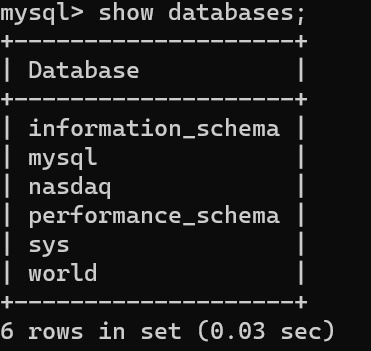

In [10]:
df = pd.read_csv("cleaned.csv")
df.head()

,symbol,period_ending,total_revenue,cost_of_revenue,gross_profit,research_and_development,"sales,_general_and_admin.",non-recurring_items,other_operating_items,operating_income,add'l_income/expense_items,earnings_before_interest_and_tax,interest_expense,earnings_before_tax,income_tax,minority_interest,equity_earnings/loss_unconsolidated_subsidiary,net_income-cont._operations,net_income,net_income_applicable_to_common_shareholders
0,a,31-10-2022,6848000,3126000,3722000,467000,1637000,215156,534329,1618000,-30000,1588000,84000,1504000,250000,75630,-32034,1254000,1254000,1254000
1,a,31-10-2021,6319000,2912000,3407000,441000,1619000,215156,534329,1347000,94000,1441000,81000,1360000,150000,75630,-32034,1210000,1210000,1210000
2,a,31-10-2020,5339000,2502000,2837000,495000,1496000,215156,534329,846000,74000,920000,78000,842000,123000,75630,-32034,719000,719000,719000
3,a,31-10-2019,5163000,2358000,2805000,404000,1460000,215156,534329,941000,52000,993000,74000,919000,-152000,75630,-32034,1071000,1071000,1071000
4,aa,31-12-2022,12451000,10212000,2239000,32000,204000,696000,617000,690000,118000,808000,106000,702000,664000,75630,-161000,-123000,-123000,-123000


In [13]:
mydb=ms.connect(host='localhost',user='root',password='1234', database='nasdaq')

print(mydb.connection_id)

18


## Creating Table

In [15]:
cursor = mydb.cursor()
create_table_query = """
CREATE TABLE IF NOT EXISTS table_name (
    symbol VARCHAR(255),
    period_ending VARCHAR(255),
    total_revenue INT,
    cost_of_revenue INT,
    gross_profit INT,
    research_and_development INT,
    sales_general_and_admin INT,
    non_recurring_items INT,
    other_operating_items INT,
    operating_income INT,
    addl_income_expense_items INT,
    earnings_before_interest_and_tax INT,
    interest_expense INT,
    earnings_before_tax INT,
    income_tax INT,
    minority_interest INT,
    equity_earnings_loss_unconsolidated_subsidiary INT,
    net_income_cont_operations INT,
    net_income INT,
    net_income_applicable_to_common_shareholders INT
)
"""
cursor.execute(create_table_query)

In [20]:
rename_query = "RENAME TABLE table_name TO financial_data "
cursor.execute(rename_query)

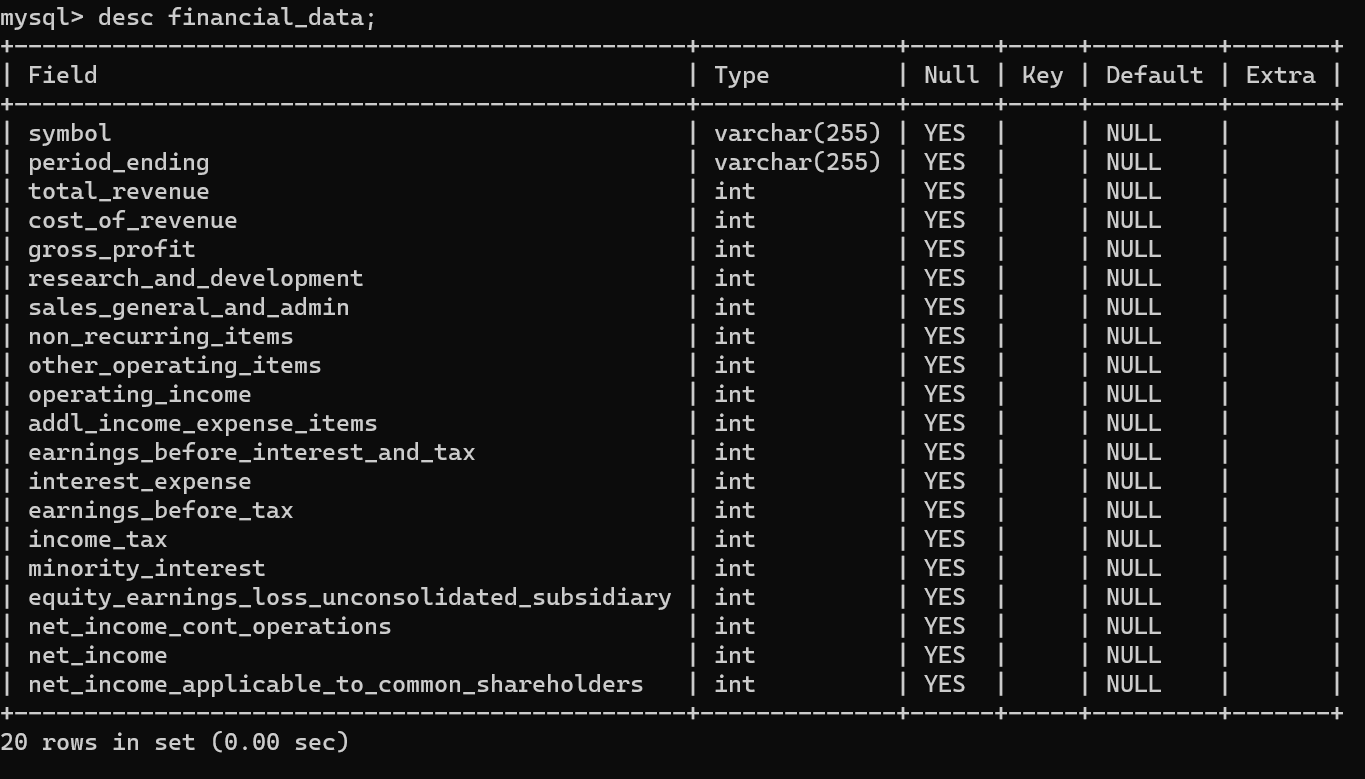

In [ ]:
for row in df.itertuples():
    insert_query = f"INSERT INTO finacial_data VALUES {row[1:]}"  
    cursor.execute(insert_query)


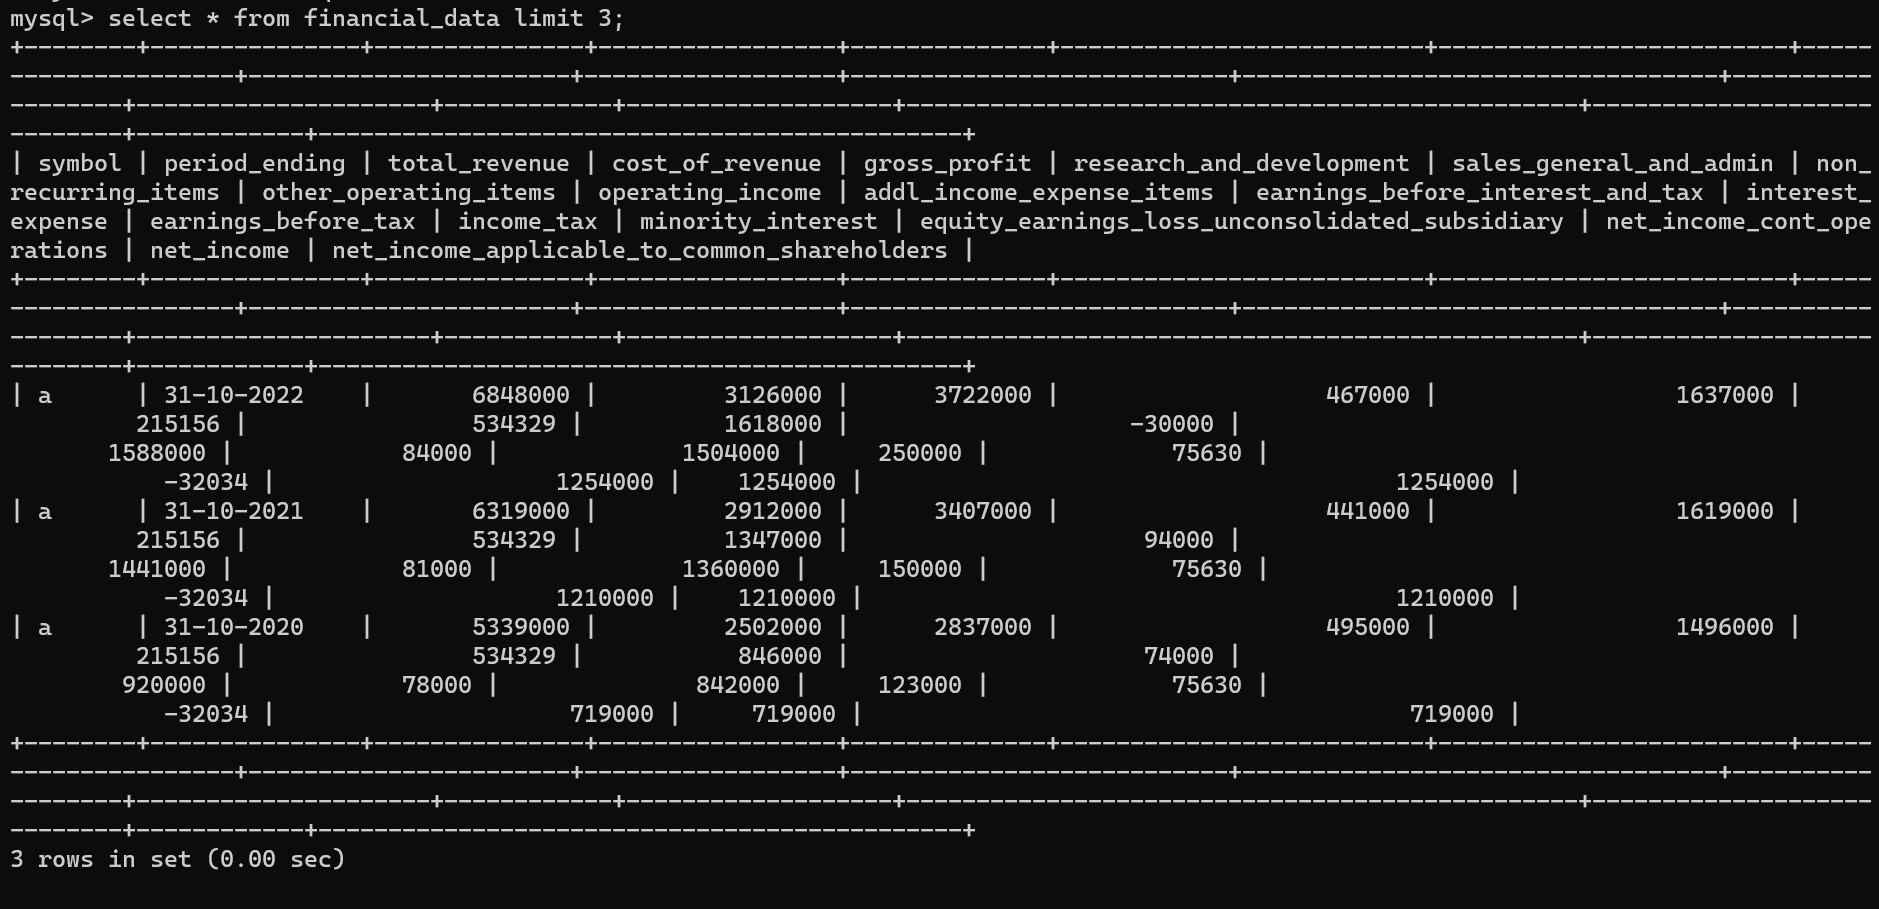

In [ ]:
alter_query = "ALTER TABLE financial_data ADD PRIMARY KEY (symbol)"     #adding primary key
cursor.execute(alter_query)

In [ ]:
mydb.commit()

## Query Examples

In [22]:
query = (
    "SELECT symbol, SUM(total_revenue) AS total_revenue, SUM(gross_profit) AS total_gross_profit "
    "FROM financial_data "
    "GROUP BY symbol;"
)

cursor.execute(query)

results = cursor.fetchall()

for row in results:
    print(row)


('a', Decimal('23669000'), Decimal('12771000'))
('aa', Decimal('44322000'), Decimal('8451000'))
('AAC', Decimal('14656104'), Decimal('5889138'))
('AACG', Decimal('100311'), Decimal('46067'))
('AACI', Decimal('9770736'), Decimal('3926092'))
('AACIU', Decimal('9770736'), Decimal('3926092'))
('AACIW', Decimal('9770736'), Decimal('3926092'))
('AADI', Decimal('4916284'), Decimal('1992627'))
('AAIC', Decimal('95186'), Decimal('95186'))
('AAIN', Decimal('95186'), Decimal('95186'))
('AAL', Decimal('141958000'), Decimal('84437000'))
('AAMC', Decimal('14661069'), Decimal('5894103'))
('AAME', Decimal('780932'), Decimal('80184'))
('AAN', Decimal('5829857'), Decimal('3404804'))
('AAOI', Decimal('859878'), Decimal('168084'))
('AAON', Decimal('2407189'), Decimal('650676'))
('AAP', Decimal('41968035'), Decimal('18627208'))
('AAPL', Decimal('1294834000'), Decimal('526966000'))
('AAT', Decimal('1509790'), Decimal('974484'))
('AAU', Decimal('19541472'), Decimal('-130'))
('AB', Decimal('19541472'), Decima

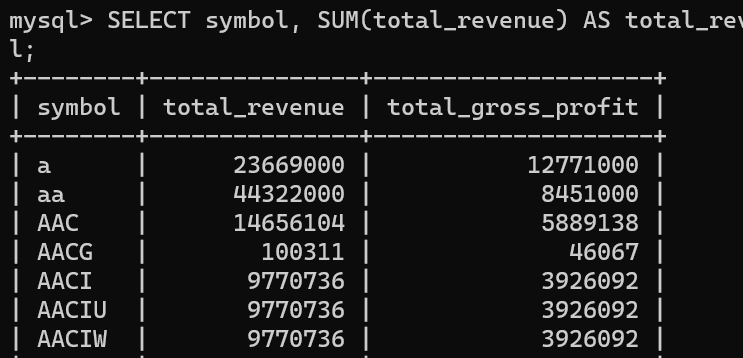

In [23]:
query="SELECT symbol, SUM(total_revenue) AS total_revenue FROM financial_data GROUP BY symbol HAVING SUM(total_revenue) > 1000000 LIMIT 50"
cursor.execute(query)

results = cursor.fetchall()

for row in results:
    print(row)

('a', Decimal('23669000'))
('aa', Decimal('44322000'))
('AAC', Decimal('14656104'))
('AACI', Decimal('9770736'))
('AACIU', Decimal('9770736'))
('AACIW', Decimal('9770736'))
('AADI', Decimal('4916284'))
('AAL', Decimal('141958000'))
('AAMC', Decimal('14661069'))
('AAN', Decimal('5829857'))
('AAON', Decimal('2407189'))
('AAP', Decimal('41968035'))
('AAPL', Decimal('1294834000'))
('AAT', Decimal('1509790'))
('AAU', Decimal('19541472'))
('AB', Decimal('19541472'))
('ABBV', Decimal('193321000'))
('ABCB', Decimal('4254476'))
('ABCL', Decimal('1105394'))
('ABCM', Decimal('1385200'))
('ABEO', Decimal('4899782'))
('ABEV', Decimal('52344100'))
('ABG', Decimal('39613600'))
('ABIO', Decimal('19541472'))
('ABL', Decimal('9770736'))
('ABLLW', Decimal('9770736'))
('ABLV', Decimal('9770736'))
('ABLVW', Decimal('9770736'))
('ABM', Decimal('26521400'))
('ABNB', Decimal('22574239'))
('ABOS', Decimal('9772172'))
('ABR', Decimal('1045529'))
('ABT', Decimal('153240000'))
('ACA', Decimal('7951700'))
('ACAB',

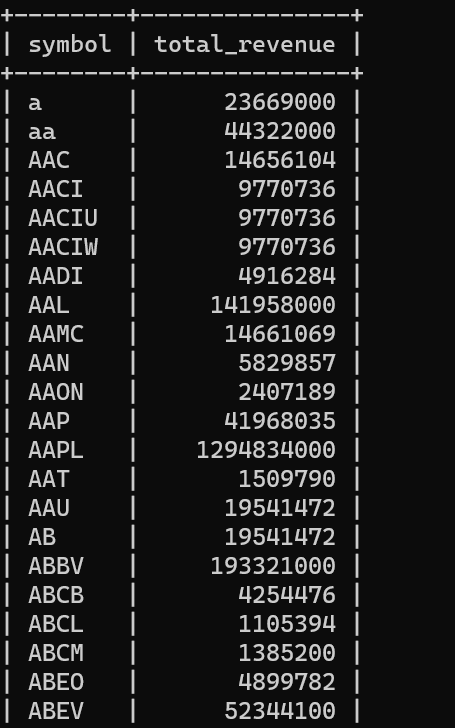

In [26]:
query = "SELECT symbol, AVG(net_income_applicable_to_common_shareholders) AS avg_net_income FROM financial_data GROUP BY symbol HAVING AVG(net_income_applicable_to_common_shareholders) > 500000 LIMIT 100;"
cursor.execute(query)

results = cursor.fetchall()

for row in results:
    print(row)

('a', Decimal('1063500.0000'))
('AAP', Decimal('524474.2500'))
('AAPL', Decimal('76787500.0000'))
('ABBV', Decimal('8969000.0000'))
('ABEV', Decimal('2616225.0000'))
('ABT', Decimal('5546500.0000'))
('ACGL', Decimal('1622054.5000'))
('ACGLN', Decimal('1622054.5000'))
('ACGLO', Decimal('1622054.5000'))
('ACI', Decimal('1112425.0000'))
('ACN', Decimal('6190843.5000'))
('ACT', Decimal('574722.7500'))
('ADBE', Decimal('4447250.0000'))
('ADI', Decimal('1680688.7500'))
('ADM', Decimal('2550000.0000'))
('ADP', Decimal('2856475.0000'))
('ADSK', Decimal('685625.0000'))
('AEE', Decimal('940750.0000'))
('AEFC', Decimal('507750.0000'))
('AEG', Decimal('507750.0000'))
('AEL', Decimal('622905.2500'))
('AEM', Decimal('554241.7500'))
('AEP', Decimal('2229125.0000'))
('AFG', Decimal('1130500.0000'))
('AFGB', Decimal('1130500.0000'))
('AFGC', Decimal('1130500.0000'))
('AFGD', Decimal('1130500.0000'))
('AFGE', Decimal('1130500.0000'))
('AFL', Decimal('4152000.0000'))
('AGCO', Decimal('584725.0000'))
('AG

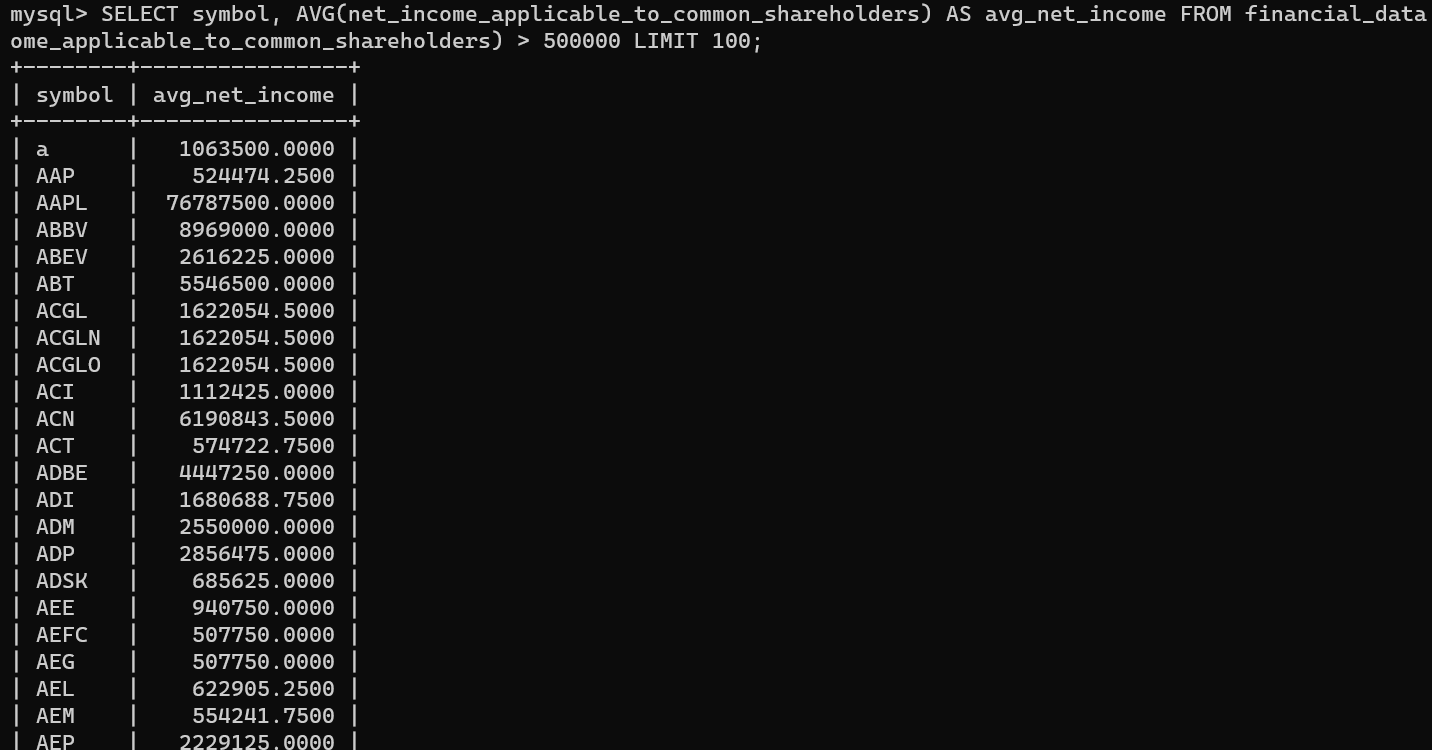

In [27]:
query="SELECT symbol, AVG(net_income_applicable_to_common_shareholders) AS avg_net_income FROM financial_data GROUP BY symbol HAVING AVG(net_income_applicable_to_common_shareholders) > 500000;"
cursor.execute(query)
results = cursor.fetchall()
for rows in results:
    print(rows)


('a', Decimal('1063500.0000'))
('AAP', Decimal('524474.2500'))
('AAPL', Decimal('76787500.0000'))
('ABBV', Decimal('8969000.0000'))
('ABEV', Decimal('2616225.0000'))
('ABT', Decimal('5546500.0000'))
('ACGL', Decimal('1622054.5000'))
('ACGLN', Decimal('1622054.5000'))
('ACGLO', Decimal('1622054.5000'))
('ACI', Decimal('1112425.0000'))
('ACN', Decimal('6190843.5000'))
('ACT', Decimal('574722.7500'))
('ADBE', Decimal('4447250.0000'))
('ADI', Decimal('1680688.7500'))
('ADM', Decimal('2550000.0000'))
('ADP', Decimal('2856475.0000'))
('ADSK', Decimal('685625.0000'))
('AEE', Decimal('940750.0000'))
('AEFC', Decimal('507750.0000'))
('AEG', Decimal('507750.0000'))
('AEL', Decimal('622905.2500'))
('AEM', Decimal('554241.7500'))
('AEP', Decimal('2229125.0000'))
('AFG', Decimal('1130500.0000'))
('AFGB', Decimal('1130500.0000'))
('AFGC', Decimal('1130500.0000'))
('AFGD', Decimal('1130500.0000'))
('AFGE', Decimal('1130500.0000'))
('AFL', Decimal('4152000.0000'))
('AGCO', Decimal('584725.0000'))
('AG

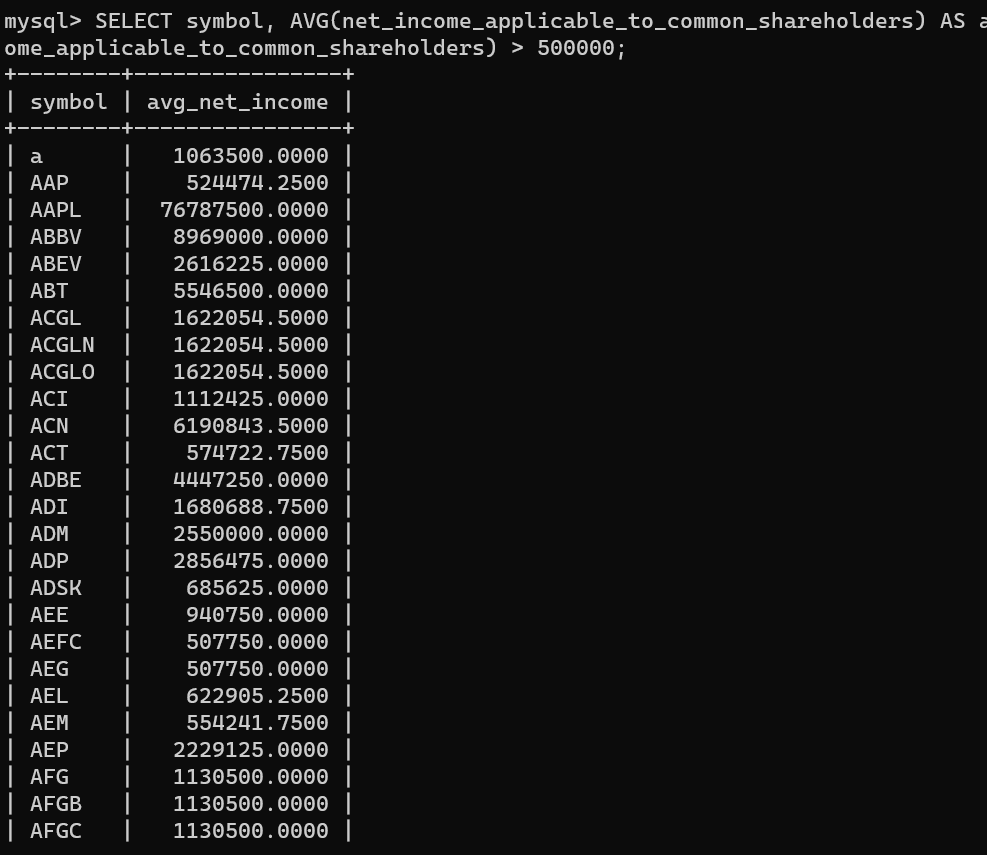

In [32]:
query = "SELECT symbol, total_revenue FROM financial_data ORDER BY total_revenue DESC limit 10"
cursor.execute(query)

results = cursor.fetchall()
for row in results:
    print(row)




('WMT', 611289000)
('WMT', 572754000)
('WMT', 559151000)
('WMT', 523964000)
('AMZN', 513983000)
('AMZN', 469822000)
('XOM', 398675000)
('AAPL', 394328000)
('AMZN', 386064000)
('SHEL', 381314000)


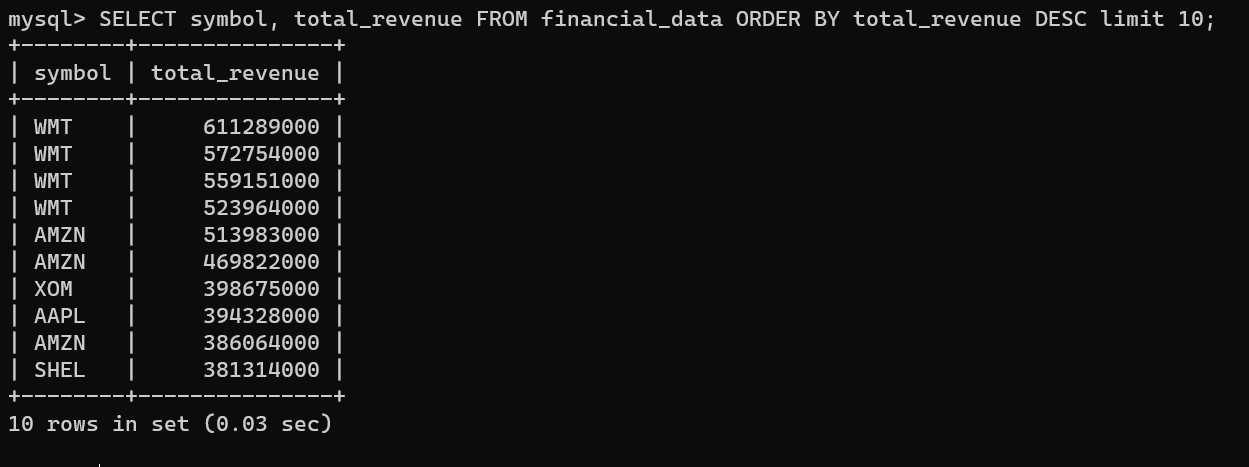

In [36]:
query = "SELECT symbol, period_ending, total_revenue FROM financial_data WHERE symbol IN (SELECT symbol FROM financial_data WHERE symbol = 'aa')"
cursor.execute(query)

results = cursor.fetchall()
for rows in results:
    print(rows)

('aa', '31-12-2022', 12451000)
('aa', '31-12-2021', 12152000)
('aa', '31-12-2020', 9286000)
('aa', '31-12-2019', 10433000)


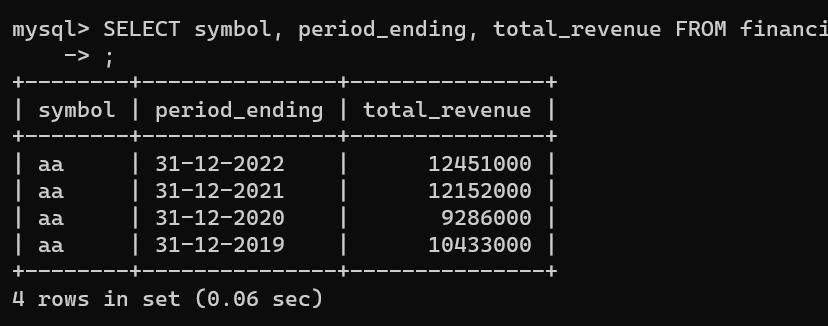

In [37]:
query = """
SELECT symbol, SUM(total_revenue) AS total_revenue
FROM financial_data
WHERE symbol IN (
    SELECT symbol
    FROM financial_data
    WHERE gross_profit > 1000000
)
GROUP BY symbol LIMIT 50
"""
cursor.execute(query)


results = cursor.fetchall()
for rows in results:
    print(rows)

('a', Decimal('23669000'))
('aa', Decimal('44322000'))
('AAC', Decimal('14656104'))
('AACI', Decimal('9770736'))
('AACIU', Decimal('9770736'))
('AACIW', Decimal('9770736'))
('AADI', Decimal('4916284'))
('AAL', Decimal('141958000'))
('AAMC', Decimal('14661069'))
('AAN', Decimal('5829857'))
('AAP', Decimal('41968035'))
('AAPL', Decimal('1294834000'))
('AB', Decimal('19541472'))
('ABBV', Decimal('193321000'))
('ABCB', Decimal('4254476'))
('ABEO', Decimal('4899782'))
('ABEV', Decimal('52344100'))
('ABG', Decimal('39613600'))
('ABIO', Decimal('19541472'))
('ABL', Decimal('9770736'))
('ABLLW', Decimal('9770736'))
('ABLV', Decimal('9770736'))
('ABLVW', Decimal('9770736'))
('ABM', Decimal('26521400'))
('ABNB', Decimal('22574239'))
('ABOS', Decimal('9772172'))
('ABT', Decimal('153240000'))
('ACAB', Decimal('9770736'))
('ACABW', Decimal('9770736'))
('ACAC', Decimal('9770736'))
('ACACU', Decimal('9770736'))
('ACACW', Decimal('9770736'))
('ACAX', Decimal('9770736'))
('ACAXR', Decimal('9770736'))
(

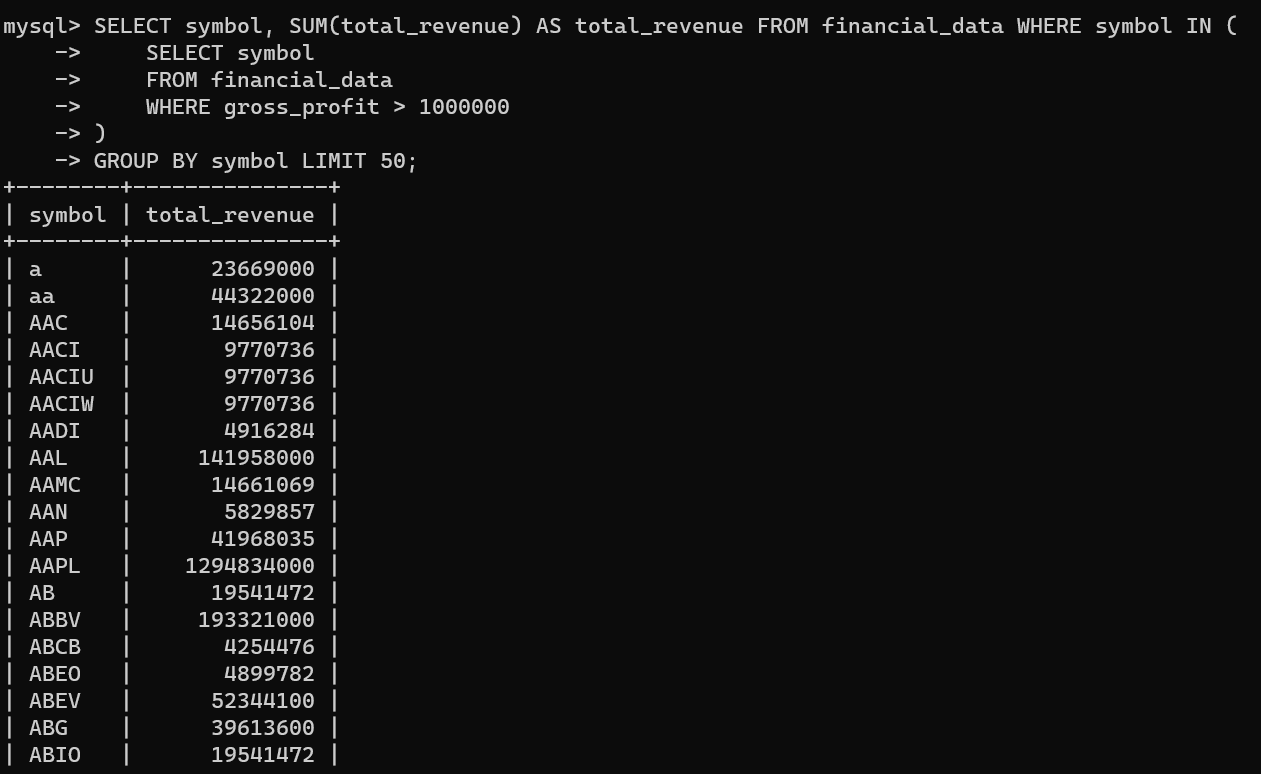

In [38]:
mydb.close()